# Goals
- Find the customer(s) who spent the most money
- Find the biggest sales day of the week
- Do all of the above while being aware of the space/time complexity

# Dataset
The original dataset, created by Rao Babar Ali, was found on Kaggle: https://www.kaggle.com/datasets/raosuny/e-commerce-purchase-dataset?resource=download. It contains customer data from a small online store throughout November 2018.



In [1]:
import pandas as pd

df = pd.read_csv('purchase_data_exe.csv')
df = df.drop(columns = 'Unnamed: 7')
df.head()

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site
0,20/11/2018,37077,505,credit,49.53,12.0,8
1,20/11/2018,59173,509,paypal,50.61,25.9,8
2,20/11/2018,41066,507,credit,85.99,34.9,11
3,20/11/2018,50741,506,credit,34.60,16.5,9
4,20/11/2018,53639,515,paypal,266.27,43.1,30


## Finding the customer(s) who spent the most money in the dataset

In [2]:
df2 = df.groupby(['customer_id']).sum(numeric_only = True)
#df2 = df2.drop(columns = ['product_category', 'time_on_site [Minutes]', 'clicks_in_site'])
df2 = df2.sort_values(by=['value [USD]'], ascending = False)

most_cust, most_val = df2['value [USD]'].idxmax(), df2['value [USD]'].max()

print(f'Customer {most_cust} spent the most on the E commerce store during November 2018, spending ${most_val}.')


Customer 51660 spent the most on the E commerce store during November 2018, spending $2668.12.


In [3]:
print('The top 5 highest spending customers:')
df2['value [USD]'].head()

The top 5 highest spending customers:


customer_id
51660    2668.12
53213    2476.42
36570    2297.75
44868    2218.57
47329    2106.99
Name: value [USD], dtype: float64

## Find the biggest sales day of the week

In [4]:
import calendar 
from datetime import date

day_of_week = []
for i in range(len(df)):
    da = pd.Timestamp(df.date.iloc[i])
    day_of_week.append(da.day_name())

day_of_week
df['day_of_week'] = day_of_week


C:\Users\timmc\AppData\Local\Temp\ipykernel_13924\2986107521.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  da = pd.Timestamp(df.date.iloc[i])


In [5]:
df3 = df.groupby(['day_of_week']).sum(numeric_only = True)
df3 = df3.sort_values(by=['value [USD]'], ascending = False)
highest_day = df3['value [USD]'].idxmax()

print(f"The biggest sales day of the week in November 2018 for the E commerce store was {highest_day}.")

The biggest sales day of the week in November 2018 for the E commerce store was Friday.


In [6]:
print("The sales for each day of the week are as follows:")
df3['value [USD]']

The sales for each day of the week are as follows:


day_of_week
Friday       1884586.16
Thursday      792353.57
Wednesday     780822.57
Tuesday       768999.51
Monday        400089.83
Sunday        391050.31
Saturday       63113.88
Name: value [USD], dtype: float64

In [7]:
df4 = df.groupby(['date']).sum(numeric_only = True)
df4 = df4.sort_values(by=['value [USD]'], ascending = False)
highest_date = df4['value [USD]'].idxmax()
hd = pd.Timestamp(highest_date)
print(f"The day with the most sales in November 2018 was the {highest_date[0:2]}th, which was a {hd.day_name()}.")

The day with the most sales in November 2018 was the 23th, which was a Friday.


C:\Users\timmc\AppData\Local\Temp\ipykernel_13924\2303377769.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hd = pd.Timestamp(highest_date)


In [8]:
import collections
unique_dates = df.date.value_counts().index.tolist()
dow = []
for date in unique_dates:
    day = pd.Timestamp(date)
    dow.append(day.day_name())

frequency = collections.Counter(dow)
print(dict(frequency))
print(df.date.value_counts())

{'Friday': 1, 'Monday': 1, 'Tuesday': 2, 'Sunday': 1, 'Thursday': 2, 'Wednesday': 2, 'Saturday': 1}
23/11/2018    7292
26/11/2018    2224
20/11/2018    2211
25/11/2018    2206
22/11/2018    2195
28/11/2018    2154
27/11/2018    2119
21/11/2018    2116
29/11/2018    2116
24/11/2018     366
Name: date, dtype: int64


C:\Users\timmc\AppData\Local\Temp\ipykernel_13924\3209535258.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day = pd.Timestamp(date)


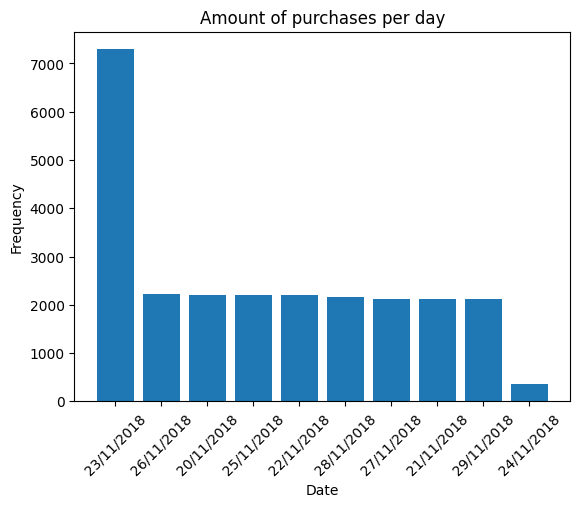

In [33]:
import matplotlib.pyplot as plt

vals = dict(df['date'].value_counts())
x = list(vals.keys())
y = list(df.date.value_counts())

plt.bar(x, y)
plt.title("Amount of purchases per day")
plt.xlabel("Date")
plt.ylabel("Frequency")
_ = plt.xticks(rotation = 45)




Although there is only one day in the dataset that falls on a Friday, the amount of purchases that occurred on that single day are greater than the next 3 top-selling days combined; this means that this day could be an anamoly as most of the days (besides the 24th) are in the 2100-2200 range.